In [10]:
import pandas as pd

In [26]:
df = pd.read_csv('EV_charging_points.csv', encoding='cp1252')
# pd.set_option('max_columns', None)
df.head(20)

,Category,City/Highway,Charging Stations
0,City,Chandigarh,48
1,City,Delhi,94
2,City,Jaipur,49
3,City,B'Lore,60
4,City,Ranchi,30
5,City,Lucknow,1
6,City,Goa,30
7,City,Hyderabad,57
8,City,Agra,15
9,City,Shimla,9


In [28]:
df.columns

Index(['Category', 'City/Highway', 'Charging Stations'], dtype='object')

In [29]:
df.describe()

,Charging Stations
count,40.000000
mean,102.450000
std,318.035472
min,1.000000
25%,19.000000
50%,46.000000
75%,77.000000
max,2049.000000


In [31]:
import numpy as np
df.replace('NA', np.nan, inplace=True)

In [36]:
df.head(20)

,Category,City/Highway,Charging Stations
0,City,Chandigarh,48
1,City,Delhi,94
2,City,Jaipur,49
3,City,B'Lore,60
4,City,Ranchi,30
5,City,Lucknow,1
6,City,Goa,30
7,City,Hyderabad,57
8,City,Agra,15
9,City,Shimla,9


In [37]:
df.isna().sum()

Category             0
City/Highway         0
Charging Stations    0
dtype: int64

In [38]:
df.isna().sum()/len(df)*100

Category             0.0
City/Highway         0.0
Charging Stations    0.0
dtype: float64

In [39]:
df.dropna(axis=1)

,Category,City/Highway,Charging Stations
0,City,Chandigarh,48
1,City,Delhi,94
2,City,Jaipur,49
3,City,B'Lore,60
4,City,Ranchi,30
5,City,Lucknow,1
6,City,Goa,30
7,City,Hyderabad,57
8,City,Agra,15
9,City,Shimla,9


In [50]:
import matplotlib.pyplot as plt
df.drop(df.tail(1).index,inplace=True)

Text(0, 0.5, 'Charging Stations')

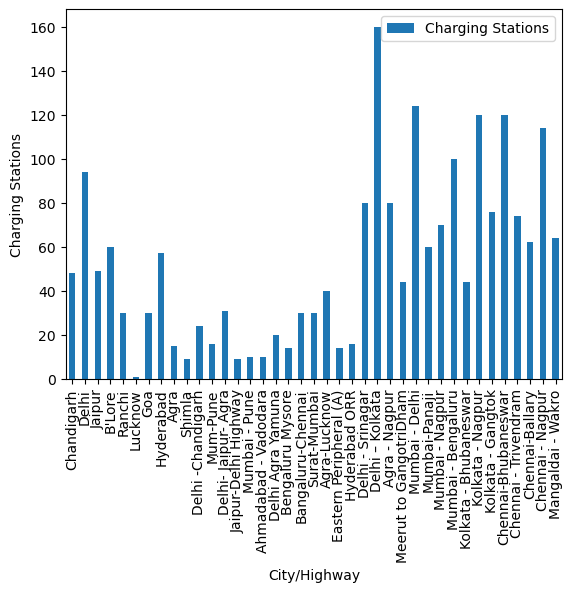

In [51]:
df.plot(kind='bar', x='City/Highway', y='Charging Stations')
plt.xlabel('City/Highway')
plt.ylabel('Charging Stations')

In [44]:
import seaborn as sns

<AxesSubplot:>

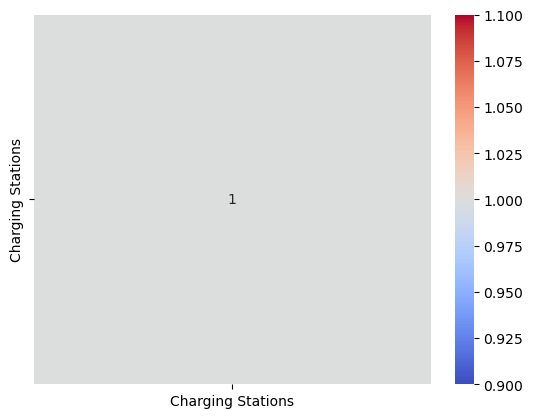

In [45]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [67]:
# df = pd.DataFrame({'label': 'City/Highway',
#                    'value': 'Charging Stations'})
# max_charging_stations = df.loc[df['Charging Stations'].idmax()]
# print("The maximum chargin points belongs to: ", max_charging_stations['City/Highway'])
# print('Total number of charging stations: ', max_charging_stations)
# max_row = df.loc[df['value'].idxmax()]
# print(max_row['label']) # Output: C
print(df.max())


Category                 Highways
City/Highway         Surat-Mumbai
Charging Stations             160
dtype: object


In [68]:
max_charging_stations = df.max(key=lambda row: float(row['Charging Stations']))
print(max_charging_stations['City/Highway'])

TypeError: max() got an unexpected keyword argument 'key'

In [75]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


features = ['Charging Stations', 'City/Highway']

scaler = StandardScaler()
X = scaler.fit_transform(df[features].values)

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
df['Cluster'] = kmeans.labels_

print(df['Cluster'].value_counts())

# df['City/Highway'] = df['City/Highway'].astype(float)
df['City/Highway'] = pd.to_numeric(df['City/Highway'], errors='coerce')


plt.scatter(df['Charging Stations'], df['City/Highway'])
plt.xlabel('Charging Stations')
plt.ylabel('City/Highway')
plt.show()

df.groupby('Cluster')[features].mean().plot(kind='bar', figsize=(10,5))
plt.xlabel('Cluster')
plt.ylabel('Average count of charging points')
plt.show()

ValueError: could not convert string to float: 'Chandigarh'